In [2]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np


# Data Visualization With Python


In [ ]:
<!-- PELICAN_BEGIN_SUMMARY -->

Data visualization and static or interactive visualizations is one of the data analysis tools to helping identify outliers
or data transformations and ideals for financial models.

This example file "1960-2017 world population and life expectancy by country" is from https://data.worldbank.org/indicator/SP.POP.TOTL and https://data.worldbank.org/indicator/SP.DYN.LE00.IN. 
The file is in Excel format with two tabs.

The maximum number of data series per chart in Excel is 255, so using Python to chart a huge dataset is very useful.

<!-- PELICAN_END_SUMMARY -->

## Convert Excel File to SQLite and Perform Financial Analysis 
- Convert Excel file in SQLite database 
- Set index
- Join Tables and Query Data in Python 
- Reading results into a pandas DataFrame
- Create query result table in SQLite and Excel
- Creating and altering tables with pandas
- Modifying primary key in SQLite or in Python
- Visualize popluation and life expectancy comparison between US and Japan from 1960 to 2017

### Convert Excel to SQLite Database
- Connect SQlite file
- Changes make in Excel, will automatically update in SQLite after reconnect
- This is very helpful, no need to save and reopen Excel file

In [3]:
filename="data/PopLife" 
con=sqlite3.connect(filename+".db")  

wb=pd.read_excel(filename+'.xlsx',sheet_name=None)
for sheet in wb:
    wb[sheet].to_sql(sheet,con, index=False, if_exists='replace')
   
con.commit()
#con.close()

C:\apps\python36\python-3.6.3.amd64\lib\site-packages\pandas\core\generic.py:1534: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


### View SQLite database after reading from Excel and Set index
- set primary key in SQLite
- we can read the file in Excel, but can't set the primary key

In [17]:
# read the first table "Population" and set the primary key to "CountryName"
population = pd.read_sql('select * from Pop', con, index_col="CountryName")
population.head()

,CountryCode,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [14]:
# read the second table "Population" and set the primary key to "CountryName"
life = pd.read_sql('select * from Life', con, index_col="CountryName")
life.head()

,CountryCode,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,68.436,...,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867,None
Afghanistan,AFG,32.292,32.742,33.185,33.624,34.060,34.495,34.928,35.361,35.796,...,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673,None
Angola,AGO,33.251,33.573,33.914,34.272,34.645,35.031,35.426,35.828,36.234,...,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547,None
Albania,ALB,62.279,63.298,64.187,64.911,65.461,65.848,66.108,66.302,66.485,...,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345,None
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


### Join Tables and Query Data in Python
### Reading results into a pandas DataFrame
- we can join table to do a query and save the result to a third table or save as Excel format

In [16]:
# lets issue a SQL statment

sql_statement='''
select l.CountryName, l.1960
from Life as l
join Pop as p on p.CountryName=l.CountryName;
'''

df_results = pd.read_sql(sql_statement, con, index_col="CountryName")
df_results.head() 

DatabaseError: Execution failed on sql '
select l.CountryName, l.1960
from Life as l
join Pop as p on p.CountryName=l.CountryName;
': near ".1960": syntax error

### Create query result table in SQLite and Excel
### Creating and altering tables with Pandas 

In [10]:
# we can create a new table for our query result and add it to the existing Life.db
df_results.to_sql("pop_life_expectancy",con, index="CountryName", if_exists='replace')
con.commit()
#con.close()


## Here is table view from DB Browser

<img src="/images/LifeNewTable.png" alt="[img: DB Browser after creating new query result to a table]" title="DbBrowser Query" />

# Visualize the data to compare US and Japan life Expectany from 1960 to 2015
- after initial data analysis, sometime we need to reshape the data for further analaysis
- we can reshape the data format to set index for visualization
- The maximum number of data series per chart in Excel is 255, this data has 264 columns as data series


In [115]:
dfr = pd.read_excel('data/LifeChart.xlsx')
year = dfr['Date']
country = dfr.loc[:,'Aruba':'Zimbabwe']  #how to select US and Japan only???? 5/24/18
print (country[0:2])

       Aruba  Afghanistan     Angola    Albania  Andorra  Arab World  \
0  65.569366    32.337561  33.226024  62.254366      NaN   46.815045   
1  65.988024    32.786976  33.547756  63.273463      NaN   47.397232   

   United Arab Emirates  Argentina    Armenia  American Samoa    ...      \
0             52.288707  65.215537  65.863463             NaN    ...       
1             53.334049  65.338512  66.284390             NaN    ...       

   Virgin Islands (U.S.)    Vietnam    Vanuatu      World      Samoa  Kosovo  \
0              66.224854  59.067024  46.487488  52.585685  49.969512     NaN   
1              66.487976  59.744195  47.088098  53.089030  50.469512     NaN   

   Yemen, Rep.  South Africa     Zambia   Zimbabwe  
0    34.363805     52.226244  45.109805  51.541976  
1    34.473244     52.568732  45.487512  51.914951  

[2 rows x 264 columns]


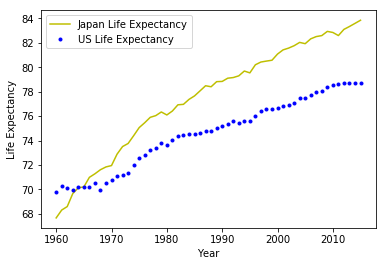

In [110]:
# Compare Japan and US life Expectancy from 1960 to 2015 and save the chart as png file, then use the chart for analysis or presentation
# It's effective to chart the dataset when dealing with huge dataset more than Excel limite 255 data series
plt.figure(1)
plt.plot(year, country['Japan'], 'y-')
plt.plot(year, country['United_States'], 'b.')
plt.legend(['Japan Life Expectancy','US Life Expectancy'])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.savefig('data/JapanLifeExpectancy.png')

In [111]:
# set index to Date
dfr.set_index('Date', inplace=True)
dfr.head()

,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
1960,65.569366,32.337561,33.226024,62.254366,NaN,46.815045,52.288707,65.215537,65.863463,NaN,...,66.224854,59.067024,46.487488,52.585685,49.969512,NaN,34.363805,52.226244,45.109805,51.541976
1961,65.988024,32.786976,33.547756,63.273463,NaN,47.397232,53.334049,65.338512,66.284390,NaN,...,66.487976,59.744195,47.088098,53.089030,50.469512,NaN,34.473244,52.568732,45.487512,51.914951
1962,66.365537,33.228927,33.888000,64.162854,NaN,47.977768,54.376488,65.432610,66.709854,NaN,...,66.741098,60.410537,47.688195,53.510894,50.969512,NaN,34.739561,52.901341,45.853659,52.277902
1963,66.713976,33.666902,34.244732,64.887098,NaN,48.560874,55.415000,65.509390,67.137854,NaN,...,66.996220,61.043024,48.287293,54.041987,51.469512,NaN,35.186780,53.234049,46.209220,52.629317
1964,67.044293,34.101902,34.617463,65.438195,NaN,49.147395,56.446073,65.582415,67.565415,NaN,...,67.260366,61.607146,48.886829,54.718962,51.969512,NaN,35.812878,53.573659,46.558683,52.971659


In [8]:
popt = pd.read_sql('select * from PopT', con, index_col="CountryName")
popt.head()

,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
CountryName,,,,,,,,,,,,,,,,,,,,,
CountryCode,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,54211,8996351,5643182,1608800,13411,92490932,92634,20619075,1874120,20013,...,32500,32670629,63699,3032160395,108646,947000,5172135,17456855,3044846,3747369
1961,55438,9166764,5753024,1659800,14375,95044497,101078,20953077,1941491,20486,...,34300,33666772,65713,3073368589,112119,966000,5260501,17920673,3140264,3870756
1962,56225,9345868,5866061,1711319,15370,97682294,112472,21287682,2009526,21117,...,35000,34684165,67808,3126509809,115788,994000,5351799,18401608,3240587,3999419
1963,56695,9533954,5980417,1762621,16412,100411076,125566,21621840,2077575,21882,...,39800,35722091,69964,3191786428,119561,1022000,5446063,18899275,3345145,4132756


In [9]:
data[data.CountryCode == 'USA']

NameError: name 'data' is not defined